#Understanding Logistic Regression in Python

Source:https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python?fbclid=IwAR3S7Y1w4P3SXRhGN02bIFX_MTvVhedtaECJb8qcOyshbDfvLMNDUXI4534

##1. Introduction to Logistic Regression

Linear Regression Equation:


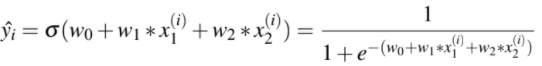  
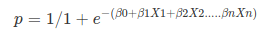

 


Properties of Logistic Regression:

>-The dependent variable in logistic regression follows*** Bernoulli Distribution***.  
>-Estimation is done through ***maximum likelihood***.  
>-No R Square, Model fitness is calculated through ***Concordance, KS-Statistics***.  

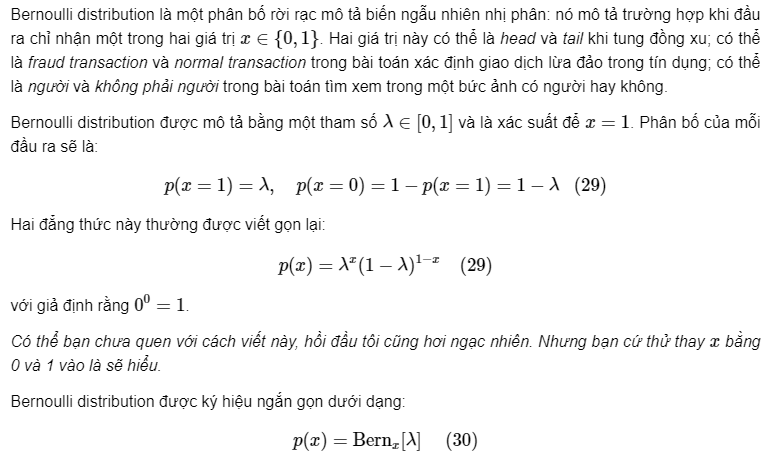

**Maximum Likelihood Estimation:**



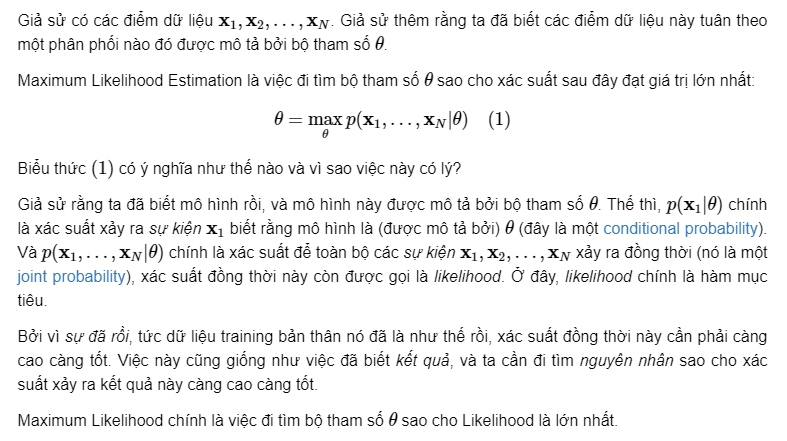





# 2. Linear Regression Vs. Logistic Regression

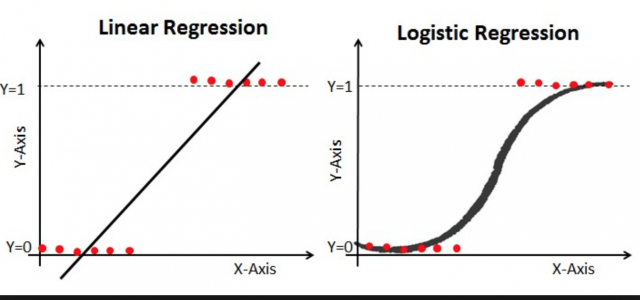

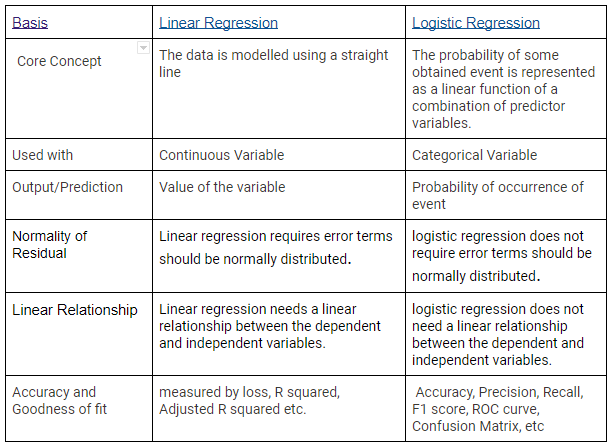

# 3. Maximum Likelihood Estimation Vs. Ordinary Least Square Method

Maximum Likelihood Estimation:
1.   Sets the mean and variance as parameters in determining the specific parametric values for a given model.
2.   Assumes a joint probability mass function.

Ordinary Least Square:

1.   Estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error).
2.   Doesn't require any stochastic assumptions for minimizing distance.




# 4. Types of Logistic Regression

 _ ***Binary Logistic Regression***: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.  
_ ***Multinomial Logistic Regression***: The target variable has three or more nominal categories such as predicting the type of Wine.  
_ **Ordinal Logistic Regression**: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

# 5. Model building in Scikit-learn



### 5.1 Loading Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/My Drive/Phương Thảo/LogisticRegression"
!ls

/content/drive/.shortcut-targets-by-id/1SdfCCaGyf_Kqs5ByUfjzhJkdK-7dhoWw/Phương Thảo/LogisticRegression
 diabetes.csv   Ex1-2.HEIC  'Ex3 -LogisticRegression.ipynb'   Ex5.ipynb
 Ex1-1.HEIC     Ex2.HEIC     Ex4.ipynb


In [ ]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
pima = pima.drop(index = 0, axis = 0)


In [ ]:
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


### 5.2 Selecting Feature

In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### 5.3 Splitting Data

In [ ]:
!pip install sklearn

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### 5.4 Model Development and Prediction

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

### 5.5 Model Evaluation using Confusion Matrix

In [ ]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

### 5.6 Visualizing Confusion Matrix using Heatmap

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

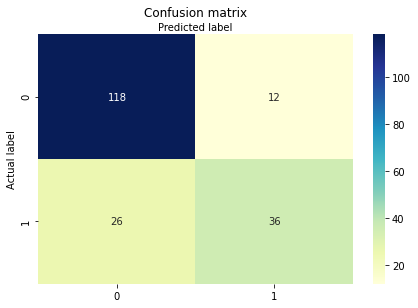

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 5.7 Confusion Matrix Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.82      0.91      0.86       130
     class 1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



### 5.8 ROC Curve

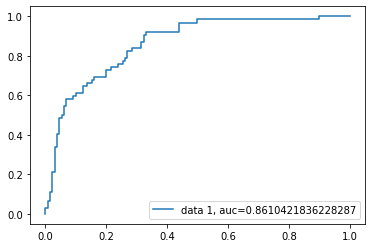

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba,pos_label = '1')
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()